# **Install dan Import Library**

In [1]:
#Install Library
!pip install nltk
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [2]:
#Import Library
#DATAFRAME
import pandas as pd
import csv

#PREPROCESSING
import numpy as np
import re
import random
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize

#PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

#SPLIT DATA
from sklearn.model_selection import train_test_split

#MODEL KLASIFIKASI
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import *

#EVALUASI
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Load data**

In [ ]:
def load_data():
  data = pd.read_csv('/content/Dataset Sentimen Terbaru.csv')
  return data

df = load_data()
df

,datetime,username,content,label
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif
...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  3594 non-null   object
 1   username  3594 non-null   object
 2   content   3594 non-null   object
 3   label     3594 non-null   object
dtypes: object(4)
memory usage: 112.4+ KB


In [ ]:
df.duplicated().sum()

5

In [ ]:
df.drop_duplicates(subset="content", keep="first", inplace = True)
df

,datetime,username,content,label
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif
...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif


In [ ]:
df.shape

(3582, 4)

Dari output di atas, ukuran dimensi yang dihasilkan terdapat 3582 jumlah baris dan 4 jumlah kolom dari dataset

In [ ]:
df.isnull().sum()

datetime    0
username    0
content     0
label       0
dtype: int64

In [ ]:
#Jumlah sentimen positif, negatif, dan netral
df_label = df["label"].value_counts()
df_label

positif    1511
netral     1102
negatif     969
Name: label, dtype: int64

# **Text Preprocessing**


**1. Case Folding**

Proses mengubah seluruh huruf menjadi huruf kecil.

In [ ]:
def lowercase(text):
  casefolding = text.lower()
  return casefolding

df['clean_teks'] = df['content'].apply(lowercase)
df

,datetime,username,content,label,clean_teks
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral,@sayainiarman @kontannews kajian pasti sudah d...
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral,sebelum kendaraan listrik digunakan secara lua...
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral,tembaga akan dibutuhkan untuk transisi energi ...
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif,@biskota_ mendukung program subsidi kendaraan ...
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...
...,...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif,@lucaxyzz @arieframadhanm @notafanofsushi @adr...
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif,@dearstarbreeze iya kaaaannnn\nintinya tu aneh...
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif,@litaanonymous @jipaveda @anaavindi @notafanof...
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif,"@notafanofsushi @adriansyahyasin jadi begini, ..."


In [ ]:
raw_sample = df['content'].iloc[91]
lower_case = lowercase(raw_sample)

print('Raw data\t: ', raw_sample)
print('\nLowercase\t: ', lower_case)

Raw data	:  @penjaga_nkri45 Agenda Presidensi G20 bisa dijadikan tempat untuk memamerkan industri kendaraan listrik Tanah Air. #NKRIMembangun

Lowercase	:  @penjaga_nkri45 agenda presidensi g20 bisa dijadikan tempat untuk memamerkan industri kendaraan listrik tanah air. #nkrimembangun


In [ ]:
raw_sample = df['content'].iloc[94]
lower_case = lowercase(raw_sample)

print('Raw data\t: ', raw_sample)
print('\nLowercase\t: ', lower_case)

Raw data	:  Misal semua kendaraan di jakarta serentak diganti mobil/motor listrik, ya tetep bakal macet. Tapi kan ga polusi. Tapi tetep macet, tong... lontong.

Lowercase	:  misal semua kendaraan di jakarta serentak diganti mobil/motor listrik, ya tetep bakal macet. tapi kan ga polusi. tapi tetep macet, tong... lontong.


**2. Cleansing Data**

  Proses cleansing data meliputi:
- Menghapus Username dan Hastag
- Menghapus URL pada text
- Menghapus angka
- Menghapus karakter tanda baca
- Menghapus emot
- Menghapus white space
- Menghapus single char
- Menghapus non ASCII chars
- Menghapus simbol, dan karakter aneh
- Menghapus kata-kata duplikat

In [ ]:
#Menghapus Username dan Hastag
def remove_user_hastag(text):
  text = re.sub('@[^\s]+','',text)
  text = re.sub("#[A-Za-z0-9_]+","", text)
  return text
df['clean_teks'] = df['clean_teks'].apply(remove_user_hastag)
df

,datetime,username,content,label,clean_teks
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral,"kajian pasti sudah dilakukan, yg paling sede..."
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral,sebelum kendaraan listrik digunakan secara lua...
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral,tembaga akan dibutuhkan untuk transisi energi ...
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif,mendukung program subsidi kendaraan listrik 🙏
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif,atau mungkin \n\nkenapa ga pake kendaraan li...
...,...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif,"ternyata ada yg sepemikiran jg, pln oversu..."
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif,iya kaaaannnn\nintinya tu aneh deh pokoknya\n...
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif,"jadi ya polusi udaranya tetep ada, polusi..."
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif,"jadi begini, penggunaan mobil/motor listrik ..."


In [ ]:
def cleansing_teks(text):
  # Menghapus URL
  text = re.sub(r'https?://\S+|www\.\S+', '', text)

  # Menghapus angka
  text = re.sub(r'[-+]?[0-9]+', '', text)

  # Menghapus karakter tanda baca/punctuation
  text = re.compile('[%s²]' % re.escape(string.punctuation)).sub(' ', text)

  #Menghapus emot dan lower case
  text = re.sub(r'[^\w\s]', '', str(text))

  #Menghapus white space
  text = re.sub(r'\s+', ' ', text)

  # remove single char
  text = re.sub(r"\b[a-zA-Z]\b","", text)

  # Menghapus non ASCII chars
  text = re.sub(r'[^\x00-\x7f]', r'', text)
  text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)

  # Remove simbol, dan karakter aneh
  text = re.sub(r"[.,:;+!\-_<^/=?\"'\d\*]", " ", text)

  # Menghapus kata-kata duplikat
  text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
  return text
df['clean_teks'] = df['clean_teks'].apply(cleansing_teks)
df

,datetime,username,content,label,clean_teks
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral,kajian pasti sudah dilakukan yg paling sederh...
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral,sebelum kendaraan listrik digunakan secara lua...
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral,tembaga akan dibutuhkan untuk transisi energi ...
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif,mendukung program subsidi kendaraan listrik
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif,atau mungkin kenapa ga pake kendaraan listrik...
...,...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif,ternyata ada yg sepemikiran jg pln oversupply...
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif,iya kaaaannnn intinya tu aneh deh pokoknya me...
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif,jadi ya polusi udaranya tetep ada polusi limb...
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif,jadi begini penggunaan mobil motor listrik ju...


**3.  Word Normalization**

Proses mengubah kata-kata ke dalam bentuk standar atau normal

In [ ]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2023-07-25 11:51:43--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2023-07-25 11:51:43 (5.93 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head(10))
key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi
5    6         acra       acara
6    7       acrany    acaranya
7    8       acrnya    acaranya
8    9       action        aksi
9   10       active       aktif


(3720, 3)

In [ ]:
# Mengubah kata menjadi baku
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  return text
df['clean_teks'] = df['clean_teks'].apply(text_normalize)
df

,datetime,username,content,label,clean_teks
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral,kajian pasti sudah dilakukan yang paling seder...
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral,sebelum kendaraan listrik digunakan secara lua...
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral,tembaga akan dibutuhkan untuk transisi energi ...
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif,mendukung program subsidi kendaraan listrik
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif,atau mungkin kenapa tidak pakai kendaraan list...
...,...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif,ternyata ada yang sepemikiran juga pln oversup...
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif,iya kaaaannnn intinya itu aneh deh pokoknya me...
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif,jadi ya polusi udaranya tetap ada polusi limba...
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif,jadi begini penggunaan mobil motor listrik jug...


**4. Tokenization**

Proses memecah teks atau dokumen menjadi potongan-potongan kecil yang disebut "token"

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(text):
    if isinstance(text, list):
        text = ' '.join(text)
    tokens = word_tokenize(text)
    return tokens

df['clean_teks'] = df['clean_teks'].apply(tokenization)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,datetime,username,content,label,clean_teks
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral,"[kajian, pasti, sudah, dilakukan, yang, paling..."
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral,"[sebelum, kendaraan, listrik, digunakan, secar..."
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral,"[tembaga, akan, dibutuhkan, untuk, transisi, e..."
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif,"[mendukung, program, subsidi, kendaraan, listrik]"
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif,"[atau, mungkin, kenapa, tidak, pakai, kendaraa..."
...,...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif,"[ternyata, ada, yang, sepemikiran, juga, pln, ..."
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif,"[iya, kaaaannnn, intinya, itu, aneh, deh, poko..."
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif,"[jadi, ya, polusi, udaranya, tetap, ada, polus..."
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif,"[jadi, begini, penggunaan, mobil, motor, listr..."


**5. Stemming**

Mengubah kata menjadi kata dasarnya

In [ ]:
def stemming(text):
    stemmer = StemmerFactory().create_stemmer()
    stemmed_tokens = [stemmer.stem(token) for token in text]
    return stemmed_tokens

df['clean_teks'] = df['clean_teks'].apply(stemming)
df

,datetime,username,content,label,clean_teks
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral,"[kaji, pasti, sudah, laku, yang, paling, seder..."
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral,"[belum, kendara, listrik, guna, cara, luas, ha..."
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral,"[tembaga, akan, butuh, untuk, transisi, energi..."
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif,"[dukung, program, subsidi, kendara, listrik]"
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif,"[atau, mungkin, kenapa, tidak, pakai, kendara,..."
...,...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif,"[nyata, ada, yang, pikir, juga, pln, oversuppl..."
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif,"[iya, kaaaannnn, inti, itu, aneh, deh, pokok, ..."
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif,"[jadi, ya, polusi, udara, tetap, ada, polusi, ..."
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif,"[jadi, begini, guna, mobil, motor, listrik, ju..."


**6. Filtering (Stopword Removal)**

Menghilangkan kata-kata yang tidak penting dalam Text Tweet

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
# Menambahkan kata lain dalam stopword yang ingin dihilangkan
more_stopword = ['dah', 'apa', 'bego', 'cuma', 'cukup', 'dg', 'deh',
                 'bkin', 'usak', 'klo', 'ga', 'gpp', 'gapapa', 'smoga',
                 'slamat', 'tdk', 'tak', 'moga', 'macam', 'hnya', 'pke', 'nih',
                 'ni', 'nie', 'tau', 'yg', 'ya', 'yaa','yak','kaaaannnn',
                 'pas','mah','jt','gaes','nya','wkwk','yok','sih','broo',
                 'cuss','m','noh','sih','guys','loh','cooyy','bangetttt','gais','behh',
                 'si','sii','lain-lain','brpikir','etapi','iya', 's','ean','d','owi',
                 'babank','bb','ber','ma','ujug','brt', 'lrt', 'hst', 'kill', 'the',
                 'rich','gigakwh','v','ngab','ow','hmm','wih','x','hehe','siihh','yah',
                 'tuh','oke','rather','mas','bro','aim','okay','non','ojo','hei','berac','au',
                 'rri','astagaaaaa','lha','anu','eitt','benur', 'bang','n','hy','yh','boro',
                 'bh','z','hahahahaha','dprd','omaaak','ml','tj','noo','drpda','brhrp','roadssszzz',
                 'wkwkw','wkwkwkkw','wkkwk','wkwkwkwmau','dahlah','wkwkk','wkwkwk','wkwkwkw',
                 'ashiap','ges','coyyy','fix','wkakwkak','wkwkwwk','wkwkkwwk','rb','wkw','know',
                 'wkkwkw','jor joran','ato','dhuuh','siii','ri','donk','ny','walaw','nael','cuann',
                 'hayu','kak','tolol','ih','kaliii','wooaah','e','aimnya','hahaha','huahahahahahahhhha',
                 'mon','hahahaha','haha','hah','bla','ahaha','hahahha','hahahaa','nabunggg','yaaa',
                 'teslahahaha','weey','ahahaha','haahahah','bahlil','huahahahah','kali','hahah','enda',
                 'hahahahahaha','k','asalllll','dok','ugm' 'fess' 'jogja','amin','wuichhh','bgtt','gtuu',
                 'aamin','ien','momain','nre','hitidak','seten','sich','tdl','pan','aaaahhhh','sihhh','ac',
                 'kipas angin','wassalam','intake','ajeee','ttg','nge','asliii','nawaitu','kyut','thread',
                 'cuy','tbh','hehehehe','hmmm','heheh','skr','heh','anjrit','ahhh','bruh','hoiya','cc','jam',
                 'ngentot','msk','u','Anjir','ka','bngttt','lur', 'affh','wuss','lho','anjg','taikotok','th','ca',
                 'kntl','nga','ah','faaak','gegara','hemmm','yahh','kah','astaganaga','bg','ahhhh','cmiww',
                 'fyi','nze','heuheuheu','en','wl','mjb','hooh','imo','banh','lohhhh','ntu','xixixi','cm','anjgggg',
                 'jing','kontoll','anjing','eeeiitttsssss','oh','alamaaakkkk','kah','jangkriikkkkk','tatidak',
                 'bokep','bk','skr', 'chn','tiiiiiittttt','heee','ck','enggaaaaaaaaaaanjing','anjjj','pen','rebuuuuu',
                 'huhuw','anjgg','hihiii','tf','jam','menit','yaaaaaaaaaaa','besteyyyy','gilaaa','ha','ho',
                 'rekkkk','berisik','aaaah','aaargghhh','aamiin', 'allah','abal','adaline','bodoh','bocil','bppjs','bund',
                 'tai','yaelah','yakan','yee','weh','al','yassss','yess','ywdah','	yassalam','yauda','yekan','awikwok',
                 'huft','ttep','memakain','ken','xixii','euyy','gokss','lpupdayln','eebiszdjt','uxftrhnbb','htetaps']

stopwords_ind = stopwords_ind + more_stopword
def remove_stop_words(tokens):
    clean_words = []
    for token in tokens:
        if token not in stopwords_ind:
            clean_words.append(token)
    return clean_words

df['clean_teks'] = df['clean_teks'].apply(remove_stop_words)
df

,datetime,username,content,label,clean_teks
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,netral,"[kaji, laku, sederhana, coba, kalkulasi, bandi..."
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,netral,"[kendara, listrik, luas, charging, station, ar..."
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,netral,"[tembaga, butuh, transisi, energi, fosil, ebt,..."
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,positif,"[dukung, program, subsidi, kendara, listrik]"
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,negatif,"[pakai, kendara, listrik, mahal, isi, daya, bo..."
...,...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,negatif,"[nyata, pikir, pln, oversupply, gencar, listri..."
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,negatif,"[inti, aneh, pokok, paksa, mobil, listrik, gal..."
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,negatif,"[polusi, udara, polusi, limbah, mobil, listrik..."
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",negatif,"[mobil, motor, listrik, pengaruh, buruk, bater..."


In [ ]:
# Mengubah label sentiment menjadi bentuk numerik
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.label = label_encoder.fit_transform(df.label.values)
df

,datetime,username,content,label,clean_teks
0,2023-02-27 22:51:22+00:00,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,1,"[kaji, laku, sederhana, coba, kalkulasi, bandi..."
1,2023-02-27 21:56:35+00:00,obyhong,Sebelum kendaraan listrik digunakan secara lua...,1,"[kendara, listrik, luas, charging, station, ar..."
2,2023-02-27 21:56:35+00:00,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,1,"[tembaga, butuh, transisi, energi, fosil, ebt,..."
3,2023-02-27 20:56:20+00:00,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,2,"[dukung, program, subsidi, kendara, listrik]"
4,2023-02-27 18:24:36+00:00,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,0,"[pakai, kendara, listrik, mahal, isi, daya, bo..."
...,...,...,...,...,...
3589,2023-01-21 10:33:35+00:00,Auzty,@lucaxyzz @arieframadhanm @notafanofsushi @adr...,0,"[nyata, pikir, pln, oversupply, gencar, listri..."
3590,2023-01-21 10:32:10+00:00,nina_aretha,@dearstarbreeze Iya kaaaannnn\nIntinya tu aneh...,0,"[inti, aneh, pokok, paksa, mobil, listrik, gal..."
3591,2023-01-21 10:26:56+00:00,uncleminho,@litaanonymous @jipaveda @anaavindi @notafanof...,0,"[polusi, udara, polusi, limbah, mobil, listrik..."
3592,2023-01-21 10:23:20+00:00,adaygpakaimulu,"@notafanofsushi @adriansyahyasin Jadi begini, ...",0,"[mobil, motor, listrik, pengaruh, buruk, bater..."


In [ ]:
# Menyimpan data yang telah melalui text preprocessing
df.to_csv('clean_data.csv', index = False)

# **Feature Engineering**

Feature engineering berfungsi untuk memisahkan kolom fitur dan target. Variabel X menampilkan 'clean_teks' dan variabel y menampilkan 'label' sentimen berupa numerik dengan menggunakan library Label Encoder yang memiliki keterangan 1 adalah sentimen netral, 0 adalah sentimen negatif, dan 2 adalah sentimen positif.

In [3]:
def load_data():
  data = pd.read_csv('/content/clean_data.csv')
  return data

df = load_data()
df.head()

,username,content,label,clean_teks
0,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,1,"['kaji', 'laku', 'sederhana', 'coba', 'kalkula..."
1,obyhong,Sebelum kendaraan listrik digunakan secara lua...,1,"['kendara', 'listrik', 'luas', 'charging', 'st..."
2,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,1,"['tembaga', 'butuh', 'transisi', 'energi', 'fo..."
3,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,2,"['dukung', 'program', 'subsidi', 'kendara', 'l..."
4,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,0,"['pakai', 'kendara', 'listrik', 'mahal', 'isi'..."


In [ ]:
#Pisahkan kolom fitur dan target
X = df['clean_teks']
y = df['label']

In [ ]:
#Menampilkan clean_teks
X

0       ['kaji', 'laku', 'sederhana', 'coba', 'kalkula...
1       ['kendara', 'listrik', 'luas', 'charging', 'st...
2       ['tembaga', 'butuh', 'transisi', 'energi', 'fo...
3       ['dukung', 'program', 'subsidi', 'kendara', 'l...
4       ['pakai', 'kendara', 'listrik', 'mahal', 'isi'...
                              ...                        
3577    ['nyata', 'pikir', 'pln', 'oversupply', 'genca...
3578    ['inti', 'aneh', 'pokok', 'paksa', 'mobil', 'l...
3579    ['polusi', 'udara', 'polusi', 'limbah', 'mobil...
3580    ['mobil', 'motor', 'listrik', 'pengaruh', 'bur...
3581    ['bagus', 'mobil', 'listrik', 'baterenya', 'ke...
Name: clean_teks, Length: 3582, dtype: object

In [ ]:
#Menampilkan data label
y

0       1
1       1
2       1
3       2
4       0
       ..
3577    0
3578    0
3579    0
3580    0
3581    0
Name: label, Length: 3582, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,2))
tf_idf.fit(X)

TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
#Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

25110


In [ ]:
print(tf_idf.get_feature_names_out())

['aaamiin' 'abai' 'abai banget' ... 'zero carbon' 'zero emisi'
 'zero emission']


In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aaamiin,abai,abai banget,abang,abang cepat,abang grab,abang motor,abang pakai,abang pinggir,abang samping,...,zaman maju,zaman mobil,zaman modern,zaman serba,zara,zara buka,zero,zero carbon,zero emisi,zero emission
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

**Feature Selection (Chi Square)**

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# fitur dengan statistik chi-squared tertinggi
chi2_features = SelectKBest(chi2, k= 5000)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 25110
Reduced feature number: 5000


In [ ]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.445218
1,0.164197
2,0.421327
3,0.571050
4,0.611175
...,...
25105,0.389704
25106,0.380717
25107,0.462028
25108,1.428503


chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya

In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.445218,aaamiin
1,0.164197,abai
2,0.421327,abai banget
3,0.571050,abang
4,0.611175,abang cepat
...,...,...
25105,0.389704,zara buka
25106,0.380717,zero
25107,0.462028,zero carbon
25108,1.428503,zero emisi


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
10859,54.797663,keren
22141,49.353697,subsidi
19780,33.547911,rakyat
1498,29.286324,banget
23659,28.122104,transportasi
...,...,...
20923,0.001468,sedia listrik
538,0.001394,anak sekolah
20951,0.000354,segi
24288,0.000350,up


In [ ]:
# Menampilkan fitur-fitur terpilih pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['abiss beliin',
 'acara alih',
 'acara pakai',
 'adaptasi',
 'adaptasi kendara',
 'adil',
 'adopsi',
 'adopsi motor',
 'adu',
 'adu urat',
 'aduh masyarakat',
 'aga',
 'aga gas',
 'agam',
 'agats',
 'agenda',
 'agenda bau',
 'agenda presidensi',
 'agung',
 'ai',
 'aiiih',
 'aiiih keren',
 'ain',
 'air',
 'air banjir',
 'air ev',
 'ajaa orang',
 'ajaib',
 'ajak',
 'ajak anak',
 'ajak masyarakat',
 'ajar transportasi',
 'ajayuk',
 'aju',
 'akal',
 'akal akal',
 'akal bulus',
 'akal sehat',
 'aki motor',
 'akibat',
 'akibat mobil',
 'akses transportasi',
 'aktivitas',
 'ala',
 'ala sales',
 'alam first',
 'alam nyoba',
 'alam pakai',
 'alas',
 'alas perintah',
 'alas ramah',
 'alas subsidi',
 'alat motor',
 'alat transportasi',
 'alesan budeg',
 'alhamdulillah',
 'alhamdulillah mudah',
 'alias',
 'alias banget',
 'alias mobil',
 'alias suara',
 'alih',
 'alih duit',
 'alih ezemka',
 'alih full',
 'alih harga',
 'alih isu',
 'alih kendara',
 'alih listrik',
 'alih motor',
 'alih pakai',
 

In [ ]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abiss beliin,acara alih,acara pakai,adaptasi,adaptasi kendara,adil,adopsi,adopsi motor,adu,adu urat,...,yuk,yuk alih,yuk ganti,yuk indonesia,yuk pakai,yuk superfriends,yuk yuk,zaman mobil,zero emisi,zero emission
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
    pickle.dump(kbest_feature, output)

# **Modeling SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from datetime import datetime
start_time = datetime.now()
from joblib import dump

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=42)

Fungsi train_test_split dari library sklearn.model_selection untuk memisahkan data menjadi data latih dan data uji dengan perbandingan 80:20 (parameter test_size=0.2). Data latih terdiri dari 80% dari seluruh data, sedangkan data uji terdiri dari 20% dari seluruh data. Fungsi train_test_split juga memiliki parameter random_state yang digunakan untuk mengatur seed pada pengacakan data.

In [ ]:
print('Banyak data X_train :',len(X_train))
print('Banyak data X_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data X_train : 2865
Banyak data X_test  : 717
Banyak data y_train : 2865
Banyak data y_test  : 717


In [ ]:
# Mencari parameter terbaik dengan GridSearch
svm_pipeline = Pipeline([
    ('svm', SVC(class_weight='balanced'))
])

params = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1, 10 , 100],
    'svm__gamma': [0.5, 10, 100],
    'svm__decision_function_shape': ['ovr','ovo']
}

grid_search = GridSearchCV(svm_pipeline, param_grid=params, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('svm', SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 10, 100],
                         'svm__decision_function_shape': ['ovr', 'ovo'],
                         'svm__gamma': [0.5, 10, 100],
                         'svm__kernel': ['linear', 'rbf']})

In [ ]:
# Melatih model SVM dengan parameter terbaik
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

Pipeline(steps=[('svm', SVC(C=10, class_weight='balanced', gamma=0.5))])

In [ ]:
#Cek Parameter Terbaik yang diperoleh dari GridSearch
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'svm__C': 10, 'svm__decision_function_shape': 'ovr', 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}


In [ ]:
# Simpan Model SVM
dump(best_svm, filename="model_sentiment_svm.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

Duration: 0:43:27.492923


In [ ]:
# Prediksi label pada data uji
model_pred = best_svm.predict(X_test)
model_pred

array([2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1,
       0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 1, 0,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1,

In [ ]:
# Label sebenarnya pada data uji (actual label)
y_test

array([2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0,
       2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1,
       2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1,

# **Modeling Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from datetime import datetime
start_time = datetime.now()
from joblib import dump

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=42)

In [ ]:
print('Banyak data X_train :',len(X_train))
print('Banyak data X_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data X_train : 2865
Banyak data X_test  : 717
Banyak data y_train : 2865
Banyak data y_test  : 717


In [ ]:
# Training model
algorithm = MultinomialNB(alpha=0.01, fit_prior=True)
model_nb = algorithm.fit(X_train, y_train)

# Simpan model hasil traning
dump(model_nb, filename='model_nb.joblib')
end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

Duration: 0:00:00.505296


In [ ]:
# Prediksi label pada data uji
model_pred_nb = model_nb.predict(X_test)
model_pred_nb

array([2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 2,

In [ ]:
# Label sebenarnya pada data uji (actual label)
y_test

array([2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0,
       2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1,
       2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1,

# **Evaluation SVM**

In [ ]:
# Jumlah data yang berhasil di prediksi & salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 579
Jumlah prediksi salah	: 138
Akurasi pengujian	: 80.75313807531381 %


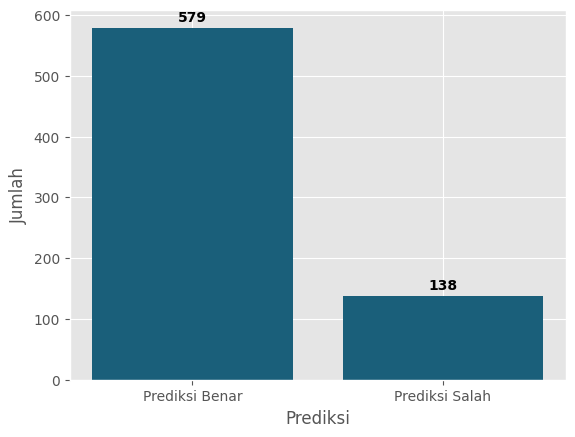

In [ ]:
# Visualisasi prediksi benar dan salah SVM
import matplotlib.pyplot as plt
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()
jumlah = [prediksi_benar, prediksi_salah]
labels = ['Prediksi Benar', 'Prediksi Salah']
fig, ax = plt.subplots()
rects = ax.bar(labels, jumlah, color=['#1A5F7A'])
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height + 5, int(height),
            ha='center', va='bottom', color='black', fontweight='bold')
plt.xlabel('Prediksi')
plt.ylabel('Jumlah')
plt.show()


In [ ]:
# Confusion Matrix SVM
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[150  31  11]
 [ 21 152  37]
 [  8  30 277]]


In [ ]:
# Classification Report SVM
from sklearn.metrics import classification_report
print('Classification report:\n',
      classification_report(y_test, model_pred, digits=2, output_dict=False, target_names=['Negatif', 'Netral', 'Positif']))

Classification report:
               precision    recall  f1-score   support

     Negatif       0.84      0.78      0.81       192
      Netral       0.71      0.72      0.72       210
     Positif       0.85      0.88      0.87       315

    accuracy                           0.81       717
   macro avg       0.80      0.79      0.80       717
weighted avg       0.81      0.81      0.81       717



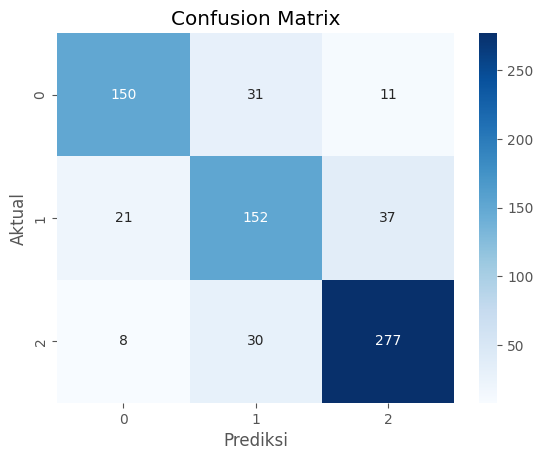

In [ ]:
# Visualisasi confusion matrix SVM
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

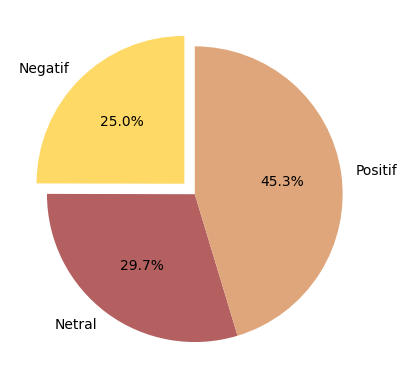

In [ ]:
# Visualisasi prediksi sentimen positif, negatif, netral
import matplotlib.pyplot as plt
sentimen_0 = sum(model_pred == 0)
sentimen_1 = sum(model_pred == 1)
sentimen_2 = sum(model_pred == 2)
values = [sentimen_0, sentimen_1, sentimen_2]

labels = ['Negatif', 'Netral', 'Positif']
colors = ['#FFD966', '#B46060', '#DFA67B']
explode = (0.1, 0, 0)
plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

# **Evaluation Naive Bayes**

In [ ]:
# Jumlah data yang berhasil di prediksi & salah di prediksi
prediksi_benar = (model_pred_nb == y_test).sum()
prediksi_salah = (model_pred_nb != y_test).sum()
print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)
accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 591
Jumlah prediksi salah	: 126
Akurasi pengujian	: 82.42677824267783 %


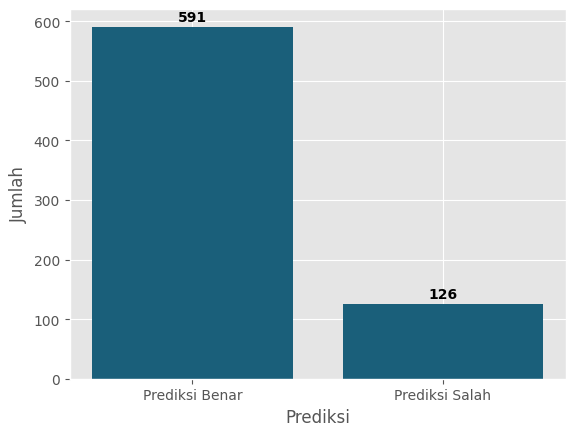

In [ ]:
# Visualisasi prediksi benar dan salah NB
import matplotlib.pyplot as plt
prediksi_benar = (model_pred_nb == y_test).sum()
prediksi_salah = (model_pred_nb != y_test).sum()
jumlah = [prediksi_benar, prediksi_salah]
labels = ['Prediksi Benar', 'Prediksi Salah']
fig, ax = plt.subplots()
rects = ax.bar(labels, jumlah, color=['#1A5F7A'])
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height + 5, int(height),
            ha='center', va='bottom', color='black', fontweight='bold')
plt.xlabel('Prediksi')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Confusion Matrix NB
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_pred_nb)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[166  18   8]
 [ 23 143  44]
 [  7  26 282]]


In [ ]:
# Classification report NB
from sklearn.metrics import classification_report
print('Classification report:\n',
      classification_report(y_test, model_pred_nb, digits=2, output_dict=False, target_names=['Negatif', 'Netral', 'Positif']))

Classification report:
               precision    recall  f1-score   support

     Negatif       0.85      0.86      0.86       192
      Netral       0.76      0.68      0.72       210
     Positif       0.84      0.90      0.87       315

    accuracy                           0.82       717
   macro avg       0.82      0.81      0.82       717
weighted avg       0.82      0.82      0.82       717



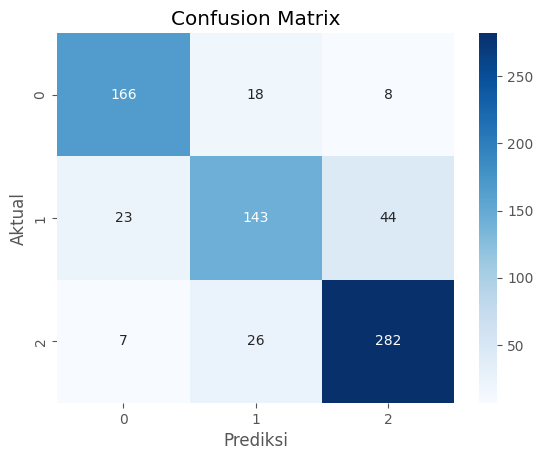

In [ ]:
# Visualisasi confusion matrix NB
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

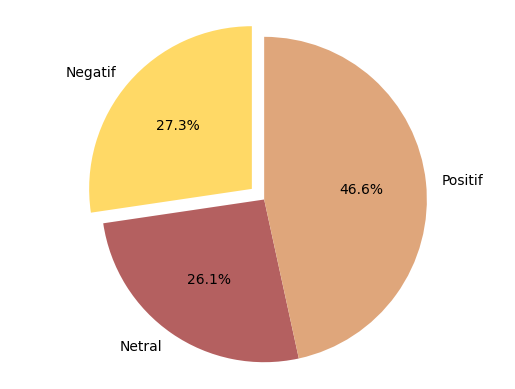

In [ ]:
# Visualisasi Prediksi NB
import matplotlib.pyplot as plt
sentimen_0 = sum(model_pred_nb == 0)
sentimen_1 = sum(model_pred_nb == 1)
sentimen_2 = sum(model_pred_nb == 2)
values = [sentimen_0, sentimen_1, sentimen_2]
labels = ['Negatif', 'Netral', 'Positif']
colors = ['#FFD966', '#B46060', '#DFA67B']
explode = (0.1, 0, 0)
plt.pie(values, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

# **Visualisasi Model SVM dan NB**

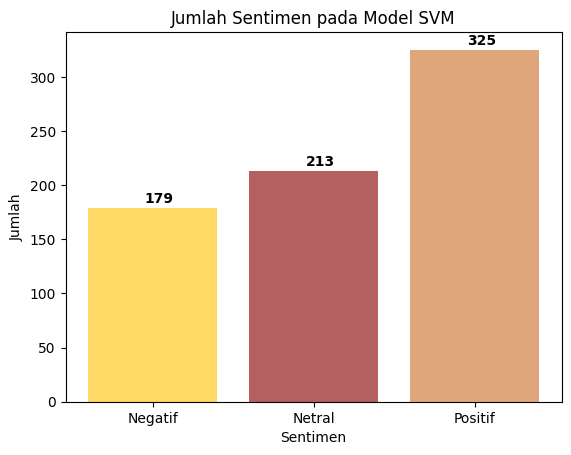

In [ ]:
#Visualisasi Prediksi SVM
import matplotlib.pyplot as plt
sentimen_0 = sum(model_pred == 0)
sentimen_1 = sum(model_pred == 1)
sentimen_2 = sum(model_pred == 2)
# Bar chart
labels = ['Negatif', 'Netral', 'Positif']
values = [sentimen_0, sentimen_1, sentimen_2]
colors = ['#FFD966', '#B46060', '#DFA67B']
plt.bar(labels, values, color=colors)
for i, v in enumerate(values):
    plt.text(i-.05, v+5, str(v), color='black', fontweight='bold')
plt.title('Jumlah Sentimen pada Model SVM')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

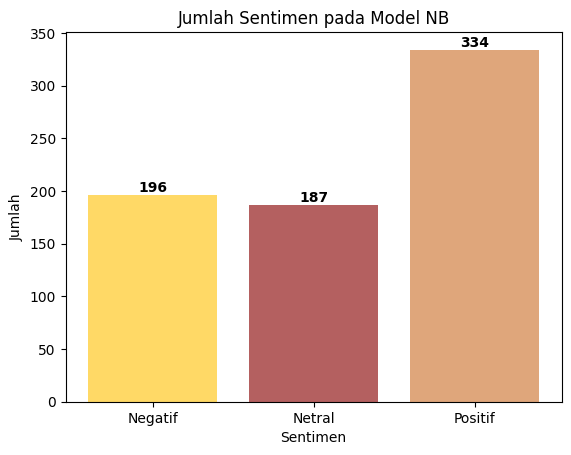

In [ ]:
#Visualisasi Prediksi NB
import matplotlib.pyplot as plt
sentimen_0 = sum(model_pred_nb == 0)
sentimen_1 = sum(model_pred_nb == 1)
sentimen_2 = sum(model_pred_nb == 2)
# Bar chart
labels = ['Negatif', 'Netral', 'Positif']
values = [sentimen_0, sentimen_1, sentimen_2]
colors = ['#FFD966', '#B46060', '#DFA67B']
plt.bar(labels, values, color=colors)
for i, v in enumerate(values):
    plt.text(i, v+3, str(v), color='black', ha='center', fontweight='bold')
plt.title('Jumlah Sentimen pada Model NB')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

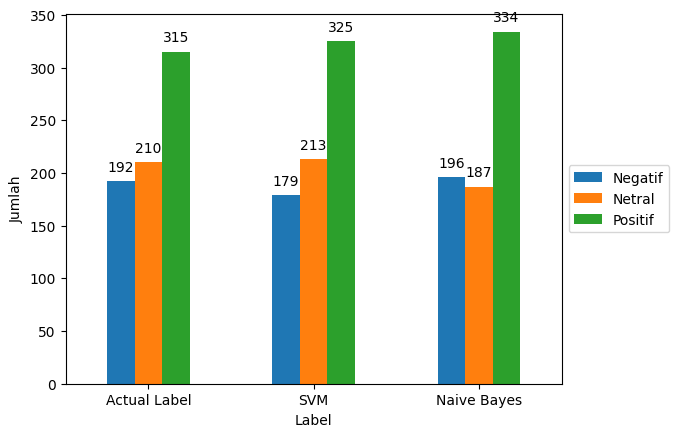

In [ ]:
# Perbandingan Actual Label, Prediksi SVM, Prediksi NB
import pandas as pd
import matplotlib.pyplot as plt

# Jumlah sentimen pada y_test (actual label)
sentimen_0_actual = sum(y_test == 0)
sentimen_1_actual = sum(y_test == 1)
sentimen_2_actual = sum(y_test == 2)

# jumlah sentimen pada model_pred (prediksi label) SVM
sentimen_0_svm = sum(model_pred == 0)
sentimen_1_svm = sum(model_pred == 1)
sentimen_2_svm = sum(model_pred == 2)

# Jumlah sentimen pada model_pred_nb (prediksi label) Naive Bayes
sentimen_0_nb = sum(model_pred_nb == 0)
sentimen_1_nb = sum(model_pred_nb == 1)
sentimen_2_nb = sum(model_pred_nb == 2)

df_sentimen = pd.DataFrame({'Negatif': [sentimen_0_actual, sentimen_0_svm, sentimen_0_nb],
                            'Netral': [sentimen_1_actual, sentimen_1_svm, sentimen_1_nb],
                            'Positif': [sentimen_2_actual, sentimen_2_svm, sentimen_2_nb]},
                           index=['Actual Label', 'SVM', 'Naive Bayes'])
# Bar chart
ax = df_sentimen.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0, horizontalalignment='center')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=5)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

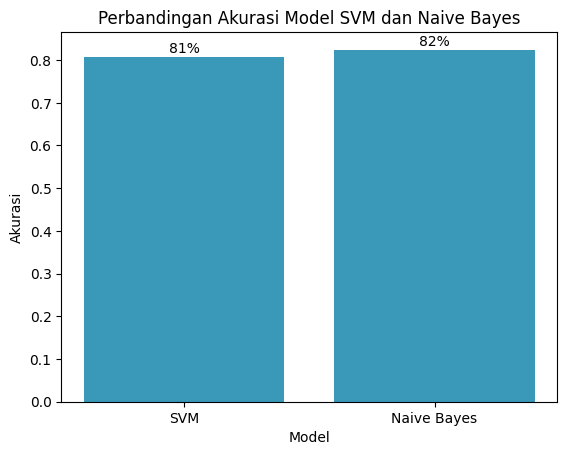

In [ ]:
# Perbandingan Akurasi Model SVM dan Naive Bayesimport matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
svm_acc = accuracy_score(y_test, model_pred)
nb_acc = accuracy_score(y_test, model_pred_nb)
labels = ['SVM', 'Naive Bayes']
values = [svm_acc, nb_acc]
colors = ['#3A98B9']
plt.bar(labels, values, color=colors)
for i in range(len(values)):
    plt.text(i, values[i]+0.01, '{:.0%}'.format(values[i]), ha='center')
plt.title('Perbandingan Akurasi Model SVM dan Naive Bayes')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()

In [ ]:
# Import Library WordCloud
import cv2
from wordcloud import WordCloud

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-04-20 01:25:43--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.002s  

2023-04-20 01:25:43 (18.1 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/clean_data.csv')
df.head()

,username,content,label,clean_teks
0,LumowaS,@sayainiarman @KontanNews Kajian pasti sudah d...,1,"['kaji', 'laku', 'sederhana', 'coba', 'kalkula..."
1,obyhong,Sebelum kendaraan listrik digunakan secara lua...,1,"['kendara', 'listrik', 'luas', 'charging', 'st..."
2,obyhong,Tembaga akan dibutuhkan untuk transisi energi ...,1,"['tembaga', 'butuh', 'transisi', 'energi', 'fo..."
3,sandyuda15,@BisKota_ Mendukung program subsidi kendaraan ...,2,"['dukung', 'program', 'subsidi', 'kendara', 'l..."
4,MIlhamP,@sk3ltah @otongkoil atau mungkin \n\nkenapa ga...,0,"['pakai', 'kendara', 'listrik', 'mahal', 'isi'..."


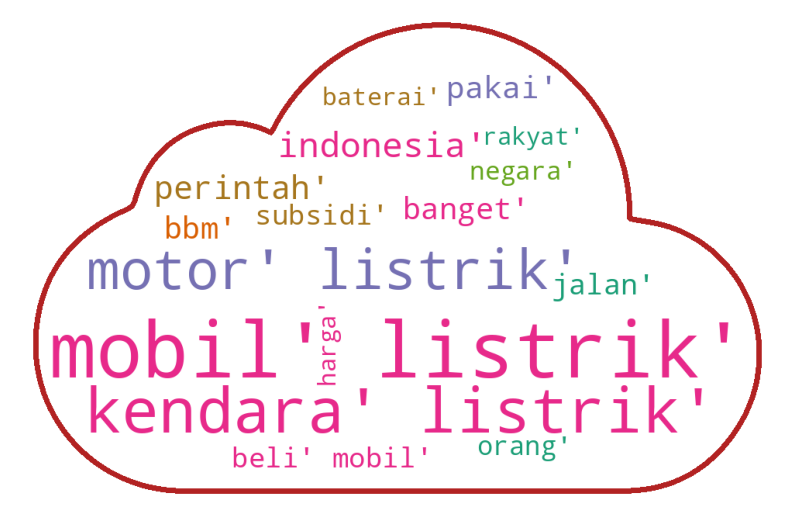

In [ ]:
# Visualisasi Word Cloud
all_text = ' '.join(df['clean_teks'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=1000).generate(all_text)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()